<b>Image Resize using Gaussian Image Pyramid</b>

In this code, we use Gaussian Image Pyramid to scale up the 8x8 image to 256x256 image, and create a function that resizes entire Numpy image array.

In [7]:
#### Dense Neural NW; Incremental Training using multiple Batches in For loop; 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import load
import gc
import cv2

print("Libraries Loaded")

Libraries Loaded


In [8]:
def Data_Loader(Batch_number):
    path ='../input/processed-batches/Batch' + str(Batch_number) 
    dict_Batch_X = load(path + '_X.npz')
    dict_Batch_Y = load(path + '_Y.npz')
    Xa = dict_Batch_X['arr_0']
    Ya = dict_Batch_Y['arr_0']
    print("Batch"+ str(Batch_number)+":", "Training Data Dim", Xa.shape,"  Label Data Dim:", Ya.shape)
    del dict_Batch_X
    del dict_Batch_Y
    return Xa, Ya



#Training_Batch = [1,2,3,4,5,6,7,8,9,10,11,12]
Training_Batch = [1]
Test_Batch = 10


X_TEST, Y_TEST =  Data_Loader(Test_Batch)
X_TEST = X_TEST[:,:,:,0]  #single channel mode


X, Y = Data_Loader(1)
X = X[:,:,:,0]  #single channel mode


print("Test Dataset's Dimensions:" ,X_TEST.shape,"class Dim: ", Y_TEST.shape)
print("Training Dataset's Dimensions:" ,X.shape,"class Dim: ", Y.shape)
#print("Validation Dataset's Dimensions:" ,Val.shape)
#print()


#Split Test images to Validation and Test
X_Tst, X_Val, Y_Tst, Y_Val = train_test_split(X_TEST, Y_TEST, test_size=0.5, random_state=0, stratify=Y_TEST)
print("Test Dataset's Dimensions:" ,X_Tst.shape,"class Dim: ", Y_Tst.shape)

#Convert to one-hot
Y_Val=tf.one_hot(Y_Val, 1000)
Y_Tst=tf.one_hot(Y_Tst, 1000)
Y=tf.one_hot(Y, 1000)


gc.collect()

Batch10: Training Data Dim (100000, 8, 8, 3)   Label Data Dim: (100000,)
Batch1: Training Data Dim (100000, 8, 8, 3)   Label Data Dim: (100000,)
Test Dataset's Dimensions: (100000, 8, 8) class Dim:  (100000,)
Training Dataset's Dimensions: (100000, 8, 8) class Dim:  (100000,)
Test Dataset's Dimensions: (50000, 8, 8) class Dim:  (50000,)


32

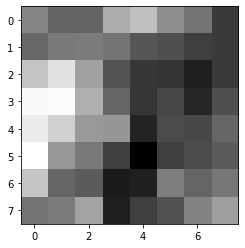

In [9]:
plt.figure(1);
plt.clf()
plt.imshow(X[11], cmap='gray')
plt.pause(0.5)


**Alternative method to image resize**

In [10]:
#tst_img = cv2.resize(X[11], (224,224), interpolation = cv2.INTER_AREA)

**This block resizes the input image using Gaussian Image Pyramid.**

Changing the level, changes the scale at which image is resized. eg: level = 4 will change an 8x8 image to 256x256 image.

Batch Pyramid resizer function resizes all images in the numpy array.

Original Shape (8, 8)
(256, 256)
Larger Shape (256, 256)


2963

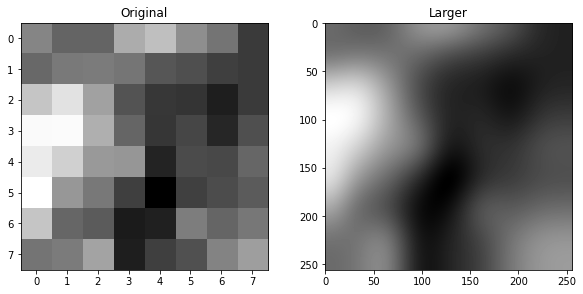

In [11]:
def Image_Pyramid_Scaler(image):
    levels = 4
    larger = cv2.pyrUp(image)
    for i in range(levels):
        larger = cv2.pyrUp(larger)
    #larger = larger[:,:,0]    #only if img is of 3 channel and needs to be in 1ch
    return larger

def batch_pyramid_resizer(Xa,Ya, start_index, batch_size):
    bulk = []
    end_index = start_index + batch_size
    print("EI:",end_index)
    
    for i in range(start_index, end_index):
        img = Image_Pyramid_Scaler(Xa[i])
        bulk.append(img)
    bulk = np.array(bulk)
    y0 = Ya[start_index:end_index]
    
    return bulk ,y0, end_index


#Sample image to test functionality

image = X[11]
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image, cmap='gray')

print("Original Shape",image.shape)
larger = Image_Pyramid_Scaler(image)
print(larger.shape)
#larger = cv2.resize(larger, (224,224), interpolation = cv2.INTER_AREA)
plt.subplot(2, 2, 2)
plt.title("Larger")
plt.imshow(larger,cmap="gray")
print("Larger Shape",larger.shape)
gc.collect()

**This function works kind of like an iterator and creates and store image batches of given size.**

Since it stores index values, Calling this successively will return next batch of images. Good for testing stuff.

In [12]:


next_start_index = next_start_index_TEST = 0
Xz, Yz, next_start_index = batch_pyramid_resizer(X, Y, next_start_index, batch_size=5000) 

Xz_TEST, Yz_TEST, next_start_index_TEST = batch_pyramid_resizer(X_TEST, Y_TEST, next_start_index_TEST, batch_size=13000)

#value, Yz, next_start_index = batch_pyramid_resizer(X, Y, next_start_index, batch_size=10000)
#value, Yz, next_start_index = batch_pyramid_resizer(X, Y, next_start_index, batch_size=10000)
#value, Yz, next_start_index = batch_pyramid_resizer(X, Y, next_start_index, batch_size=10000)
#value, Yz, next_start_index = batch_pyramid_resizer(X, Y, next_start_index, batch_size=10000)
#value, Yz, next_start_index = batch_pyramid_resizer(X, Y, next_start_index, batch_size=10000)
#value, Yz, next_start_index = batch_pyramid_resizer(X, Y, next_start_index, batch_size=10000)
#value, Yz, next_start_index = batch_pyramid_resizer(X, Y, next_start_index, batch_size=10000)
#value, Yz, next_start_index = batch_pyramid_resizer(X, Y, next_start_index, batch_size=10000)
#value, Yz, next_start_index = batch_pyramid_resizer(X, Y, next_start_index, batch_size=10000)

del X_TEST
del Y_TEST
gc.collect()
Xz.shape

EI: 5000
EI: 13000


(5000, 256, 256)